# Imports and custom functions

In [1]:
import pandas as pd
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
plotly.offline.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt

In [2]:
# Global options

sns.set_style("white")
sns.set(font_scale=2, style="ticks")

height=15
aspect=1
x_jitter=0
y_jitter=0

xlim=(0,14)
ylim=(-14, 10)
alpha=1
# marker='o'
s=10
legend=False
linewidth=0

In [3]:
def prepare_df(df_path, df_name):

    """Read in information from dataframe"""

    # read in df1
    df = pd.read_csv(df_path, header=0, sep="\t")
    # Mark significants
    df["Significant"]  = "No"
    df.loc[(df["FDR"] < 0.05) & (df["logCPM"]>2), "Significant"] = "FDR<0.05\nlogCPM>2"
    # set id as index
    df.set_index("id", inplace=True)
    # rename columns
    df.columns = df.columns + "_" + df_name
    # reset index
    df.reset_index(inplace=True)

    return df

In [4]:
def merge_df(df_1, df_2, df_1_name, df_2_name):
    
    """Merge dataframes"""
    
    df = pd.merge(df_1, df_2, on="id", how="right")
    
    df["Significant"] = "No"
    
    df.loc[(df[f"FDR_{df_2_name}"]<0.05) &
               (df[f"logCPM_{df_2_name}"]>2),
               "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2"
    
    df.loc[(df[f"FDR_{df_2_name}"]<0.05) &
               (df[f"logCPM_{df_2_name}"]>2) &
               (df[f"FDR_{df_1_name}"]<0.05) &
               (df[f"logFC_{df_1_name}"]>0) &
               (df[f"logCPM_{df_1_name}"]>2),
                "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"
    
    return df

In [5]:
def prepare_sc_plot(df, df_1_name, df_2_name):
    sns_plot = sns.scatterplot(x=f"logCPM_{df_2_name}",
                               y=f"logFC_{df_2_name}",
                               data=df.sort_values(["Significant"]),
                               s=s,
                               hue="Significant",
                               hue_order=["No", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"],
                               palette=["black", "blue", "red"],
                               alpha=alpha,
                               x_jitter=x_jitter,
                               y_jitter=y_jitter,
                               linewidth=linewidth)
    sns_plot.set(xlim=xlim, ylim=ylim)

    return sns_plot

In [6]:
def prepare_sc_plot_simple(df, df_name):
    sns_plot = sns.scatterplot(x=f"logCPM_{df_name}",
                               y=f"logFC_{df_name}",
                               data=df.sort_values([f"Significant_{df_name}"]),
                               s=s,
                               hue=f"Significant_{df_name}",
                               hue_order=["No", "FDR<0.05\nlogCPM>2"],
                               palette=["black", "blue"],
                               alpha=alpha,
                               x_jitter=x_jitter,
                               y_jitter=y_jitter,
                               linewidth=linewidth)
    sns_plot.set(xlim=xlim, ylim=ylim)
    return sns_plot

# Input files

In [7]:
ip_path = "../WAGO_3_IP/results/DE__N2_Input_Rpph__N2_xf119_Rpph/plot_small_RNAs/22G.tsv"
ip_name = "WAGO-3"

ip_wago_9_path = "../WAGO_9_IP/results/DE__wago-9_input__wago-9_IP/plot_small_RNAs/22G.tsv"
ip_wago_9_name = "WAGO-9"

ip_csr_1_path = "../csr_1_IP/results/DE__csr-1_input__csr-1_IP/plot_small_RNAs/22G.tsv"
ip_csr_1_name = "csr-1"

Dpf_3_null_path = "../small_RNA_seq_15_C/results/DE__WT__Dpf_3_null/plot_small_RNAs/22G.tsv"
Dpf_3_null_name = "Dpf_3_null"

Dpf_3_S784A_path = "../small_RNA_seq_15_C/results/DE__WT__Dpf_3_S784A//plot_small_RNAs/22G.tsv"
Dpf_3_S784A_name = "Dpf_3_S784A"

mut_2_path = "../small_RNA_seq_15_C/results/DE__WT__mut_2/plot_small_RNAs/22G.tsv"
mut_2_name = "mut_2"

mut_7_path = "../small_RNA_seq_15_C/results/DE__WT__mut_7/plot_small_RNAs/22G.tsv"
mut_7_name = "mut_7"

# Manually read in the different files

In [8]:
# read in dataframe
df_wago_3 = prepare_df(ip_path, ip_name)
df_wago_9 = prepare_df(ip_wago_9_path, ip_wago_9_name)
df_csr_1 = prepare_df(ip_csr_1_path, ip_csr_1_name)
df_Dpf_3_null = prepare_df(Dpf_3_null_path, Dpf_3_null_name)
df_Dpf_3_S784A = prepare_df(Dpf_3_S784A_path, Dpf_3_S784A_name)
df_mut_2 = prepare_df(mut_2_path, mut_2_name)
df_mut_7 = prepare_df(mut_7_path, mut_7_name)

In [9]:
# merge dfs pairwise
df_wago_3_Dpf_3_null = merge_df(df_wago_3, df_Dpf_3_null, ip_name, Dpf_3_null_name)
df_wago_3_Dpf_3_S784A = merge_df(df_wago_3, df_Dpf_3_S784A, ip_name, Dpf_3_S784A_name)
df_wago_3_mut_2 = merge_df(df_wago_3, df_mut_2, ip_name, mut_2_name)
df_wago_3_mut_7 = merge_df(df_wago_3, df_mut_7, ip_name, mut_7_name)

df_wago_9_Dpf_3_null = merge_df(df_wago_9, df_Dpf_3_null, ip_wago_9_name, Dpf_3_null_name)
df_wago_9_Dpf_3_S784A = merge_df(df_wago_9, df_Dpf_3_S784A, ip_wago_9_name, Dpf_3_S784A_name)
df_wago_9_mut_2 = merge_df(df_wago_9, df_mut_2, ip_wago_9_name, mut_2_name)
df_wago_9_mut_7 = merge_df(df_wago_9, df_mut_7, ip_wago_9_name, mut_7_name)

df_csr_1_Dpf_3_null = merge_df(df_csr_1, df_Dpf_3_null, ip_csr_1_name, Dpf_3_null_name)
df_csr_1_Dpf_3_S784A = merge_df(df_csr_1, df_Dpf_3_S784A, ip_csr_1_name, Dpf_3_S784A_name)
df_csr_1_mut_2 = merge_df(df_csr_1, df_mut_2, ip_csr_1_name, mut_2_name)
df_csr_1_mut_7 = merge_df(df_csr_1, df_mut_7, ip_csr_1_name, mut_7_name)

In [61]:
df_wago_3_Dpf_3_null["Significant"].value_counts()

FDR_Dpf_3_null<0.05\nlogCPM_Dpf_3_null>2\nFDR_WAGO-3<0.05\nlogFC_WAGO-3>0\nlogCPM_WAGO-3>2    4402
No                                                                                            3489
FDR_Dpf_3_null<0.05\nlogCPM_Dpf_3_null>2                                                      3297
Name: Significant, dtype: int64

In [72]:
df_wago_3[(df_wago_3["Significant_WAGO-3"]=="FDR<0.05\nlogCPM>2") & (df_wago_3["logFC_WAGO-3"]>2)]

,id,logFC_WAGO-3,logCPM_WAGO-3,LR_WAGO-3,PValue_WAGO-3,FDR_WAGO-3,Significant_WAGO-3
4,GAAAAAAAATAAAGCACTGCAG,2.561523,3.849042,45.375748,1.626358e-11,9.996615e-11,FDR<0.05\nlogCPM>2
18,GAAAAAAAGACGGTGACAAATG,3.358227,2.481321,34.265986,4.807104e-09,1.620156e-08,FDR<0.05\nlogCPM>2
19,GAAAAAAAGAGATCTAACAAAT,2.400983,2.712023,24.341467,8.068335e-07,1.655793e-06,FDR<0.05\nlogCPM>2
20,GAAAAAAAGAGATTTGCCGAAT,2.449128,2.568979,24.067540,9.301511e-07,1.882116e-06,FDR<0.05\nlogCPM>2
21,GAAAAAAATACGAATGAACAAC,2.583073,3.395358,37.220334,1.055079e-09,4.171379e-09,FDR<0.05\nlogCPM>2
23,GAAAAAAATATAACCCGTGAAT,2.031821,2.734869,19.856077,8.349689e-06,1.423986e-05,FDR<0.05\nlogCPM>2
26,GAAAAAAATGCACTGTATGTAA,3.701604,2.751584,40.143082,2.360259e-10,1.092587e-09,FDR<0.05\nlogCPM>2
31,GAAAAAACAACTCGAGAATGTG,2.232181,4.787627,56.408027,5.888947e-14,6.478414e-13,FDR<0.05\nlogCPM>2
32,GAAAAAACACGTCTTGACACAA,2.507342,4.027752,42.166586,8.382002e-11,4.332615e-10,FDR<0.05\nlogCPM>2
34,GAAAAAACATATTACGGACATT,2.102470,3.327929,25.649049,4.094972e-07,8.908957e-07,FDR<0.05\nlogCPM>2


In [11]:
df_wago_3_Dpf_3_S784A["Significant"].value_counts()

FDR_Dpf_3_S784A<0.05\nlogCPM_Dpf_3_S784A>2\nFDR_WAGO-3<0.05\nlogFC_WAGO-3>0\nlogCPM_WAGO-3>2    4688
FDR_Dpf_3_S784A<0.05\nlogCPM_Dpf_3_S784A>2                                                      3835
No                                                                                              2498
Name: Significant, dtype: int64

In [12]:
df_wago_3_mut_2["Significant"].value_counts()

FDR_mut_2<0.05\nlogCPM_mut_2>2                                                      5589
FDR_mut_2<0.05\nlogCPM_mut_2>2\nFDR_WAGO-3<0.05\nlogFC_WAGO-3>0\nlogCPM_WAGO-3>2    4992
No                                                                                   272
Name: Significant, dtype: int64

In [13]:
df_wago_3_mut_7["Significant"].value_counts()

FDR_mut_7<0.05\nlogCPM_mut_7>2                                                      5498
FDR_mut_7<0.05\nlogCPM_mut_7>2\nFDR_WAGO-3<0.05\nlogFC_WAGO-3>0\nlogCPM_WAGO-3>2    5082
No                                                                                   922
Name: Significant, dtype: int64

In [14]:
df_wago_9_Dpf_3_null["Significant"].value_counts()

FDR_Dpf_3_null<0.05\nlogCPM_Dpf_3_null>2                                                      5979
No                                                                                            3489
FDR_Dpf_3_null<0.05\nlogCPM_Dpf_3_null>2\nFDR_WAGO-9<0.05\nlogFC_WAGO-9>0\nlogCPM_WAGO-9>2    1720
Name: Significant, dtype: int64

In [15]:
df_wago_9_Dpf_3_S784A["Significant"].value_counts()

FDR_Dpf_3_S784A<0.05\nlogCPM_Dpf_3_S784A>2                                                      6540
No                                                                                              2498
FDR_Dpf_3_S784A<0.05\nlogCPM_Dpf_3_S784A>2\nFDR_WAGO-9<0.05\nlogFC_WAGO-9>0\nlogCPM_WAGO-9>2    1983
Name: Significant, dtype: int64

In [16]:
df_wago_9_mut_2["Significant"].value_counts()

FDR_mut_2<0.05\nlogCPM_mut_2>2                                                      8328
FDR_mut_2<0.05\nlogCPM_mut_2>2\nFDR_WAGO-9<0.05\nlogFC_WAGO-9>0\nlogCPM_WAGO-9>2    2253
No                                                                                   272
Name: Significant, dtype: int64

In [17]:
df_wago_9_mut_7["Significant"].value_counts()

FDR_mut_7<0.05\nlogCPM_mut_7>2                                                      8295
FDR_mut_7<0.05\nlogCPM_mut_7>2\nFDR_WAGO-9<0.05\nlogFC_WAGO-9>0\nlogCPM_WAGO-9>2    2285
No                                                                                   922
Name: Significant, dtype: int64

In [18]:
df_csr_1_Dpf_3_null["Significant"].value_counts()

FDR_Dpf_3_null<0.05\nlogCPM_Dpf_3_null>2                                                   7427
No                                                                                         3489
FDR_Dpf_3_null<0.05\nlogCPM_Dpf_3_null>2\nFDR_csr-1<0.05\nlogFC_csr-1>0\nlogCPM_csr-1>2     272
Name: Significant, dtype: int64

In [19]:
df_csr_1_Dpf_3_S784A["Significant"].value_counts()

FDR_Dpf_3_S784A<0.05\nlogCPM_Dpf_3_S784A>2                                                   8190
No                                                                                           2498
FDR_Dpf_3_S784A<0.05\nlogCPM_Dpf_3_S784A>2\nFDR_csr-1<0.05\nlogFC_csr-1>0\nlogCPM_csr-1>2     333
Name: Significant, dtype: int64

In [20]:
df_csr_1_mut_2["Significant"].value_counts()

FDR_mut_2<0.05\nlogCPM_mut_2>2                                                   10016
FDR_mut_2<0.05\nlogCPM_mut_2>2\nFDR_csr-1<0.05\nlogFC_csr-1>0\nlogCPM_csr-1>2      565
No                                                                                 272
Name: Significant, dtype: int64

In [21]:
df_csr_1_mut_7["Significant"].value_counts()

FDR_mut_7<0.05\nlogCPM_mut_7>2                                                   10041
No                                                                                 922
FDR_mut_7<0.05\nlogCPM_mut_7>2\nFDR_csr-1<0.05\nlogFC_csr-1>0\nlogCPM_csr-1>2      539
Name: Significant, dtype: int64

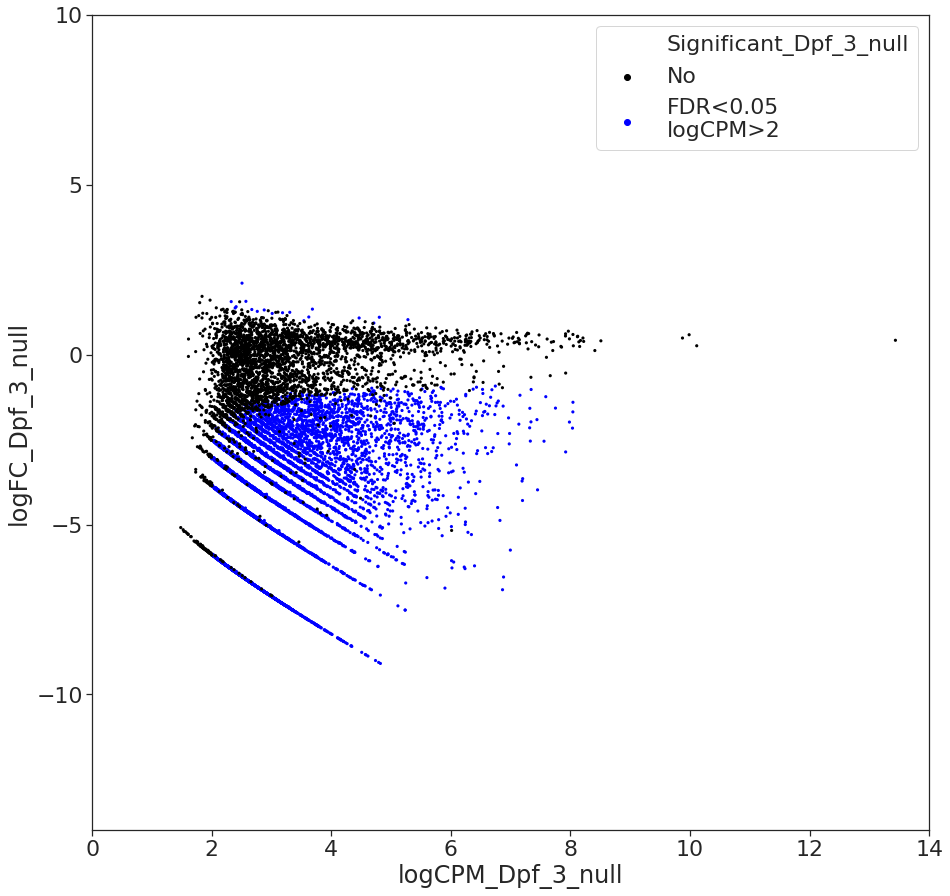

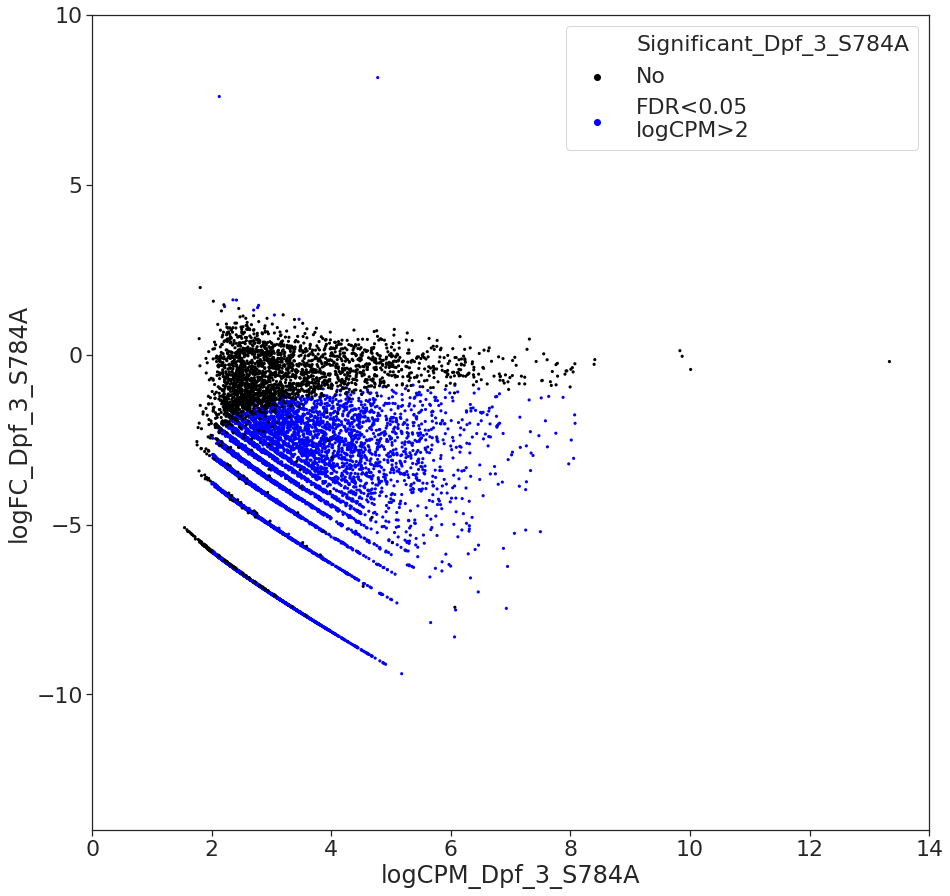

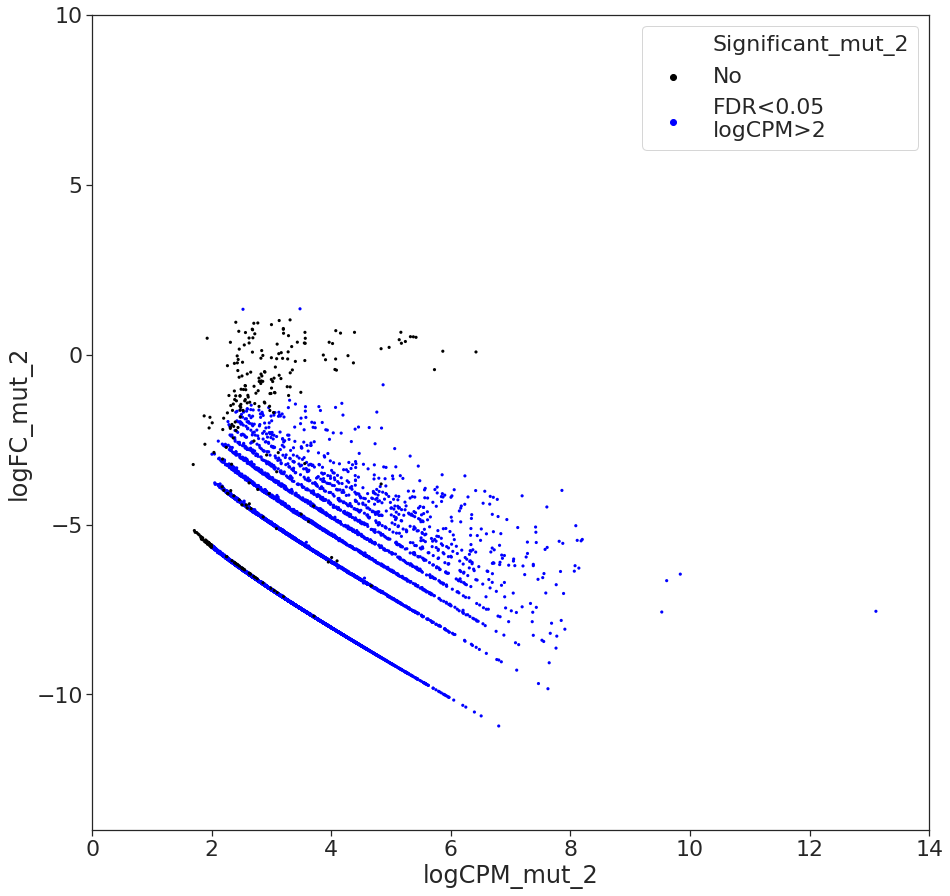

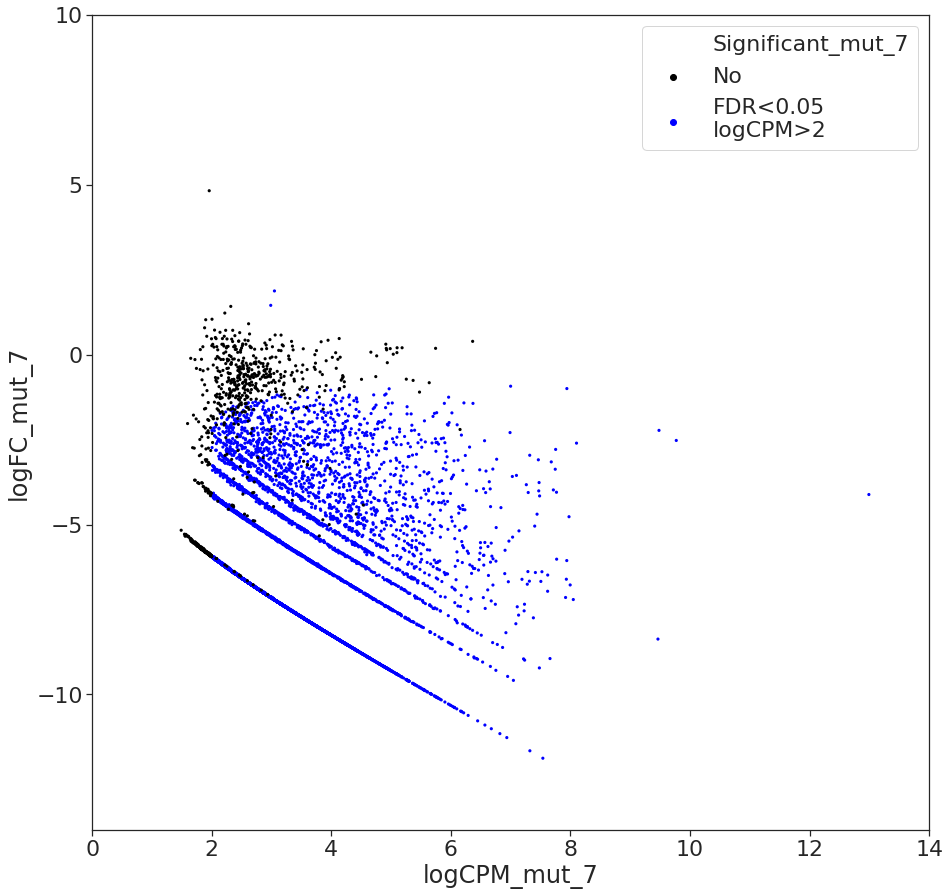

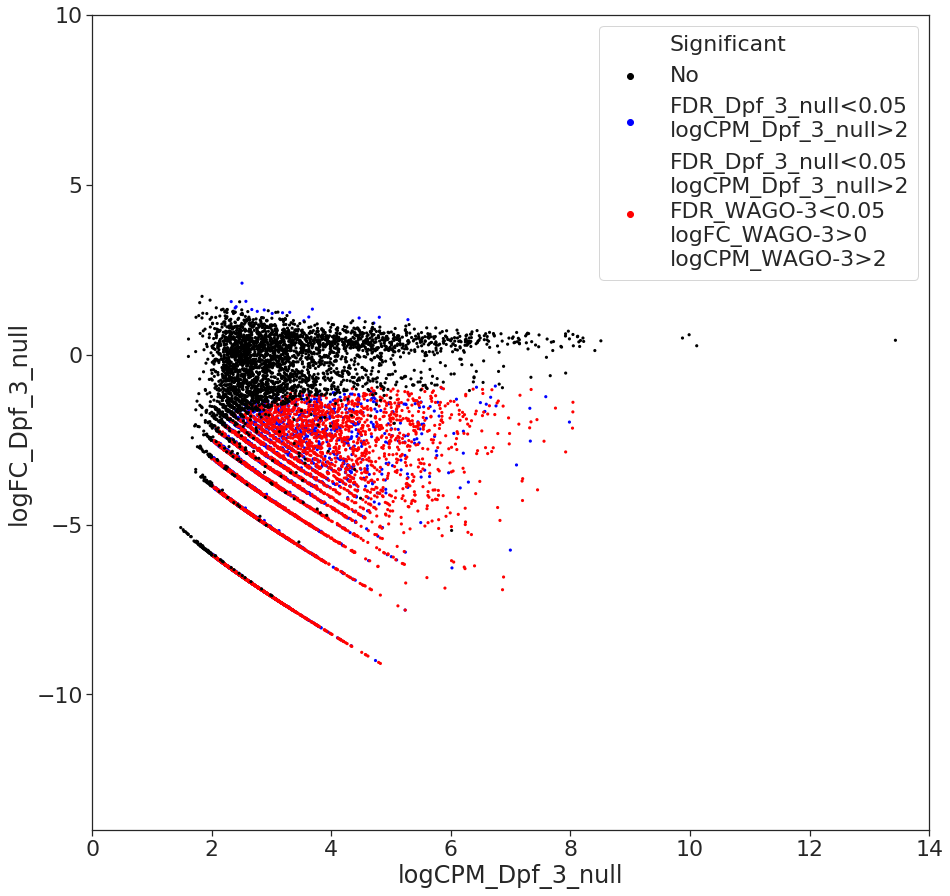

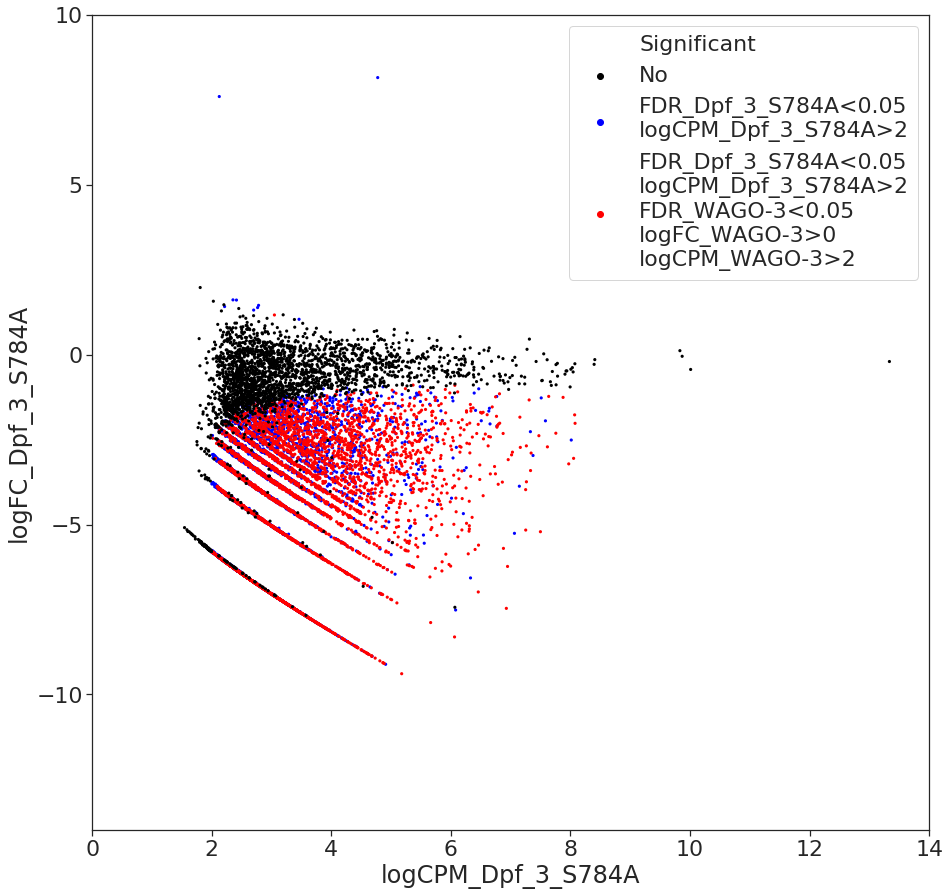

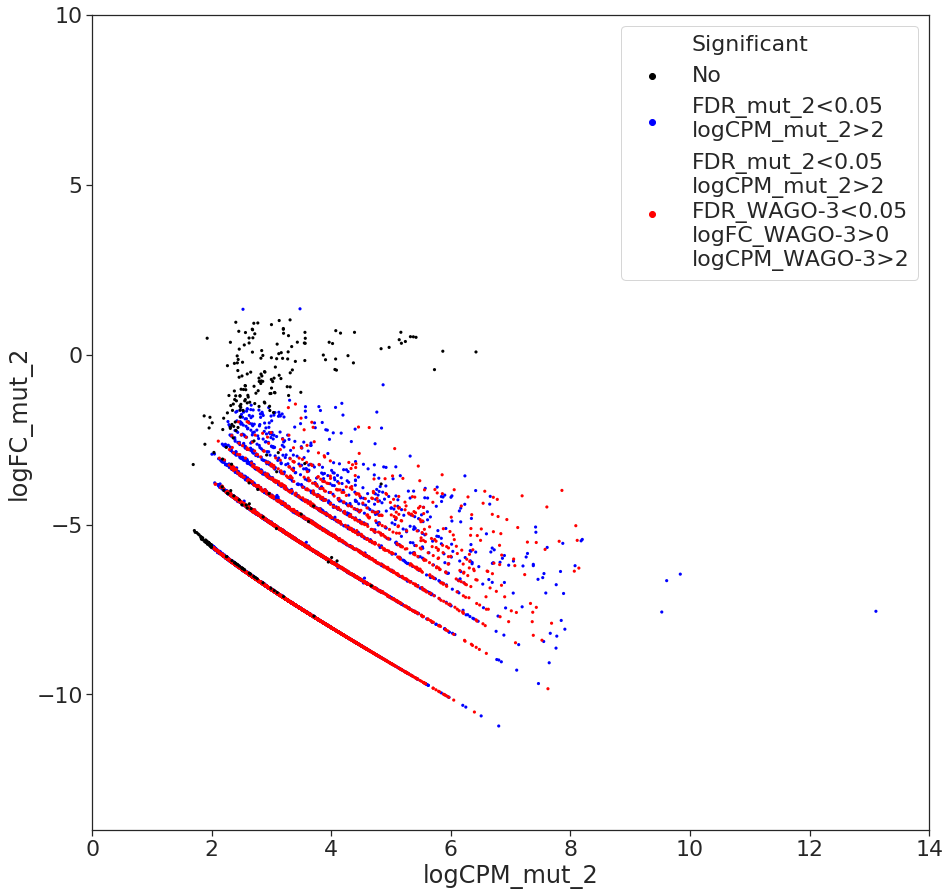

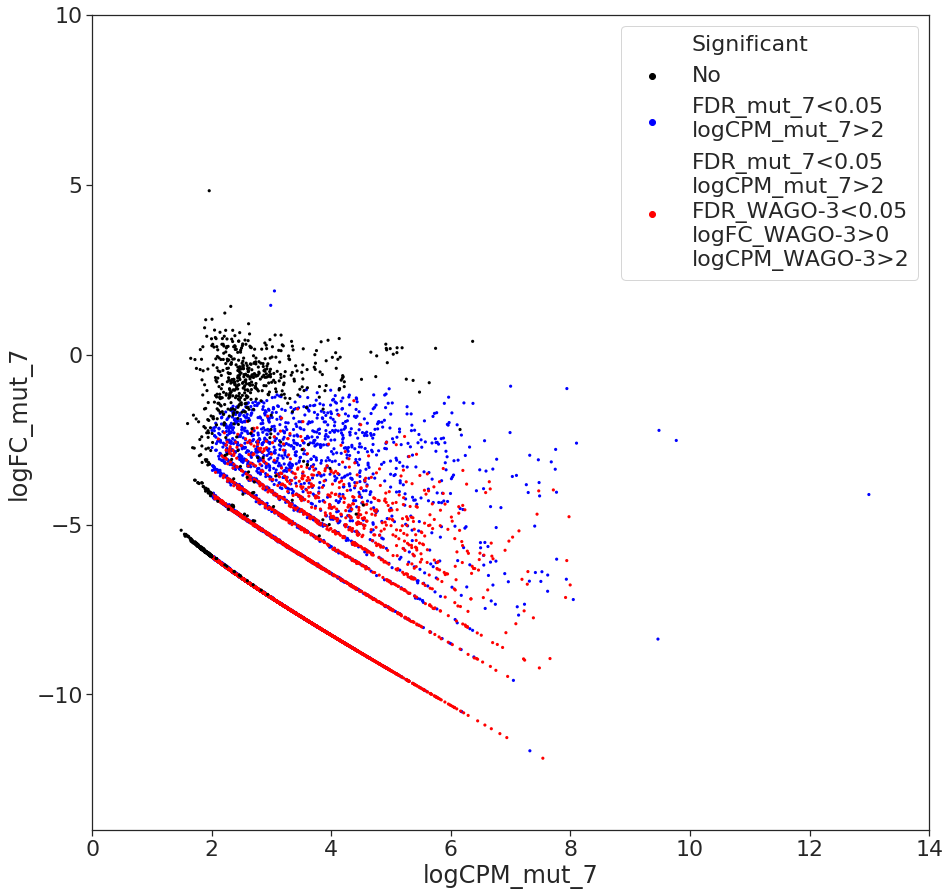

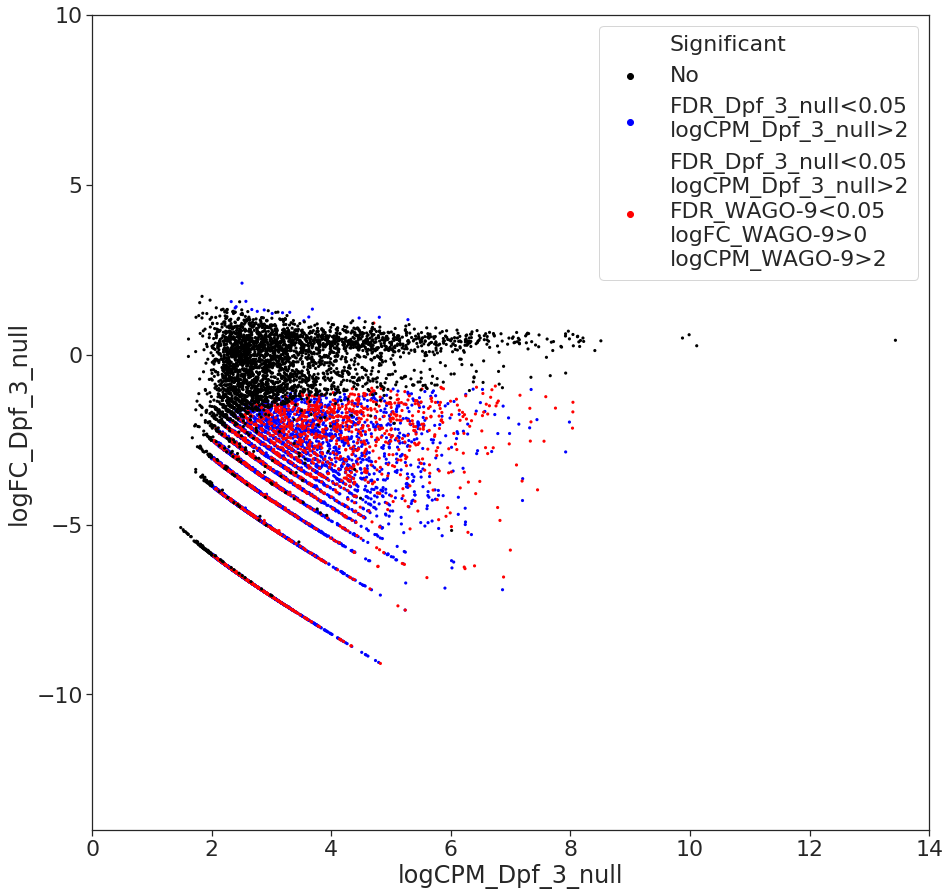

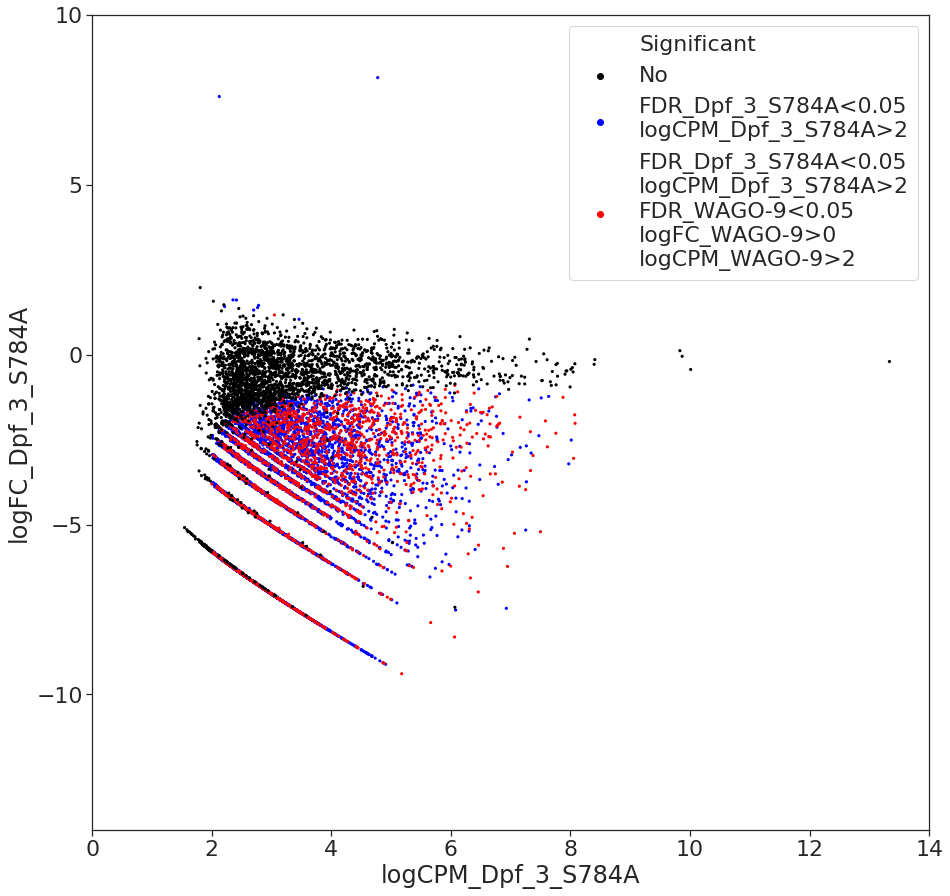

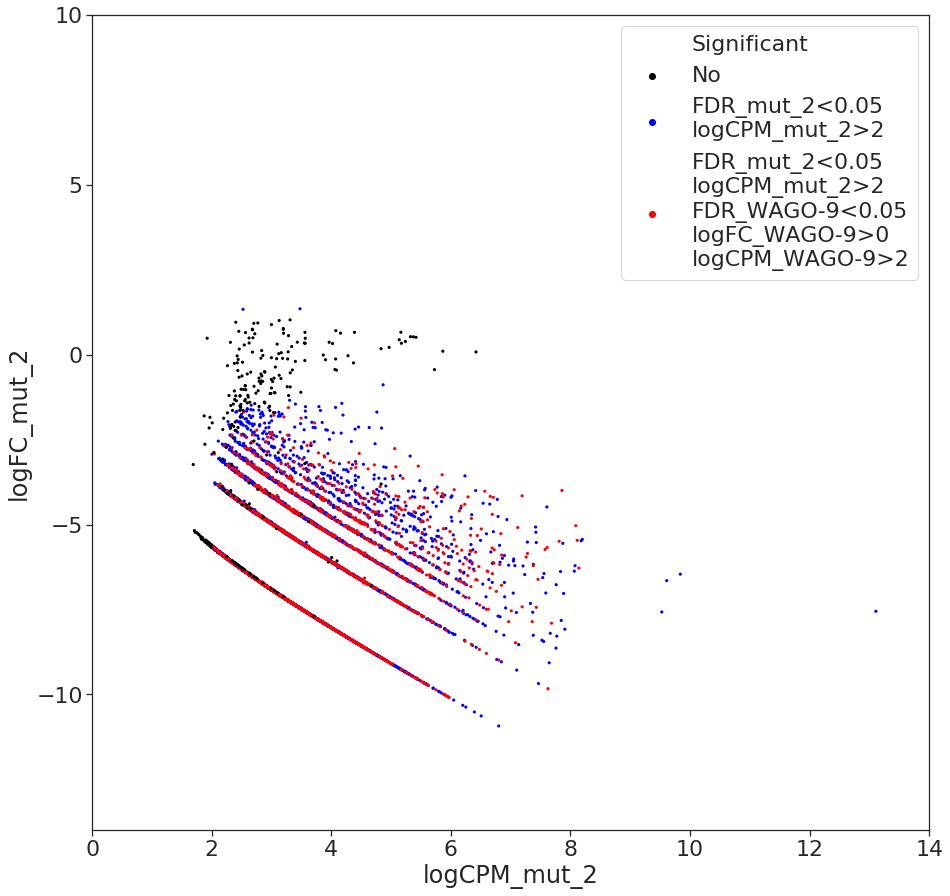

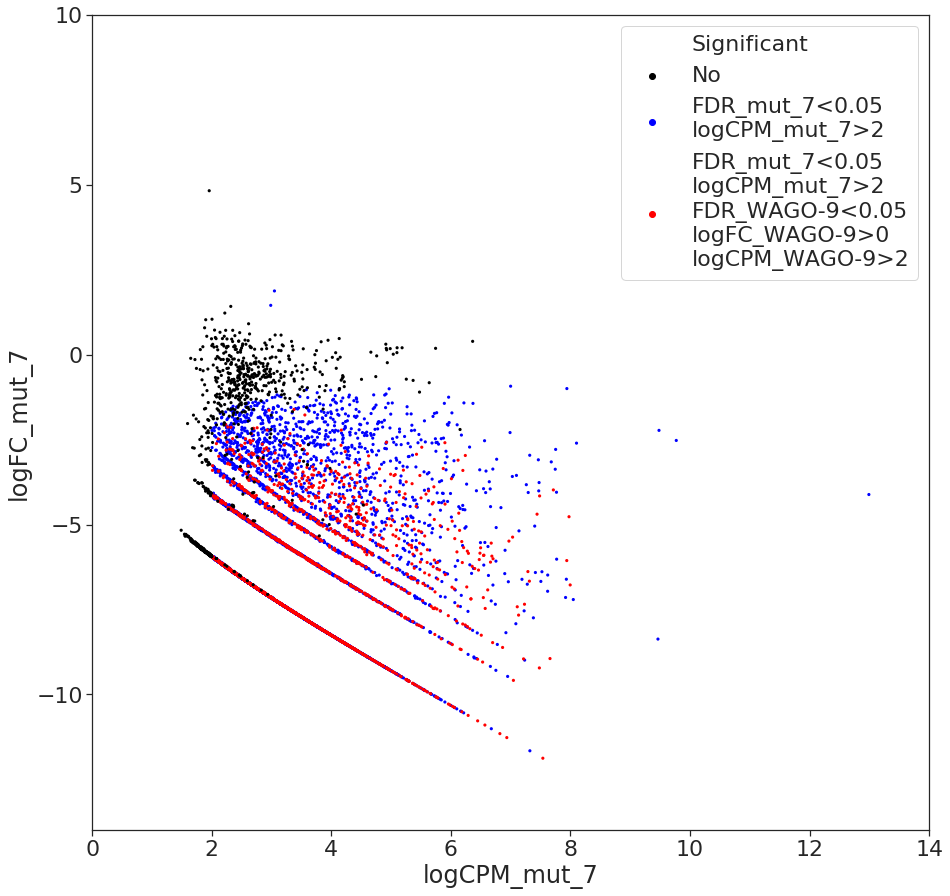

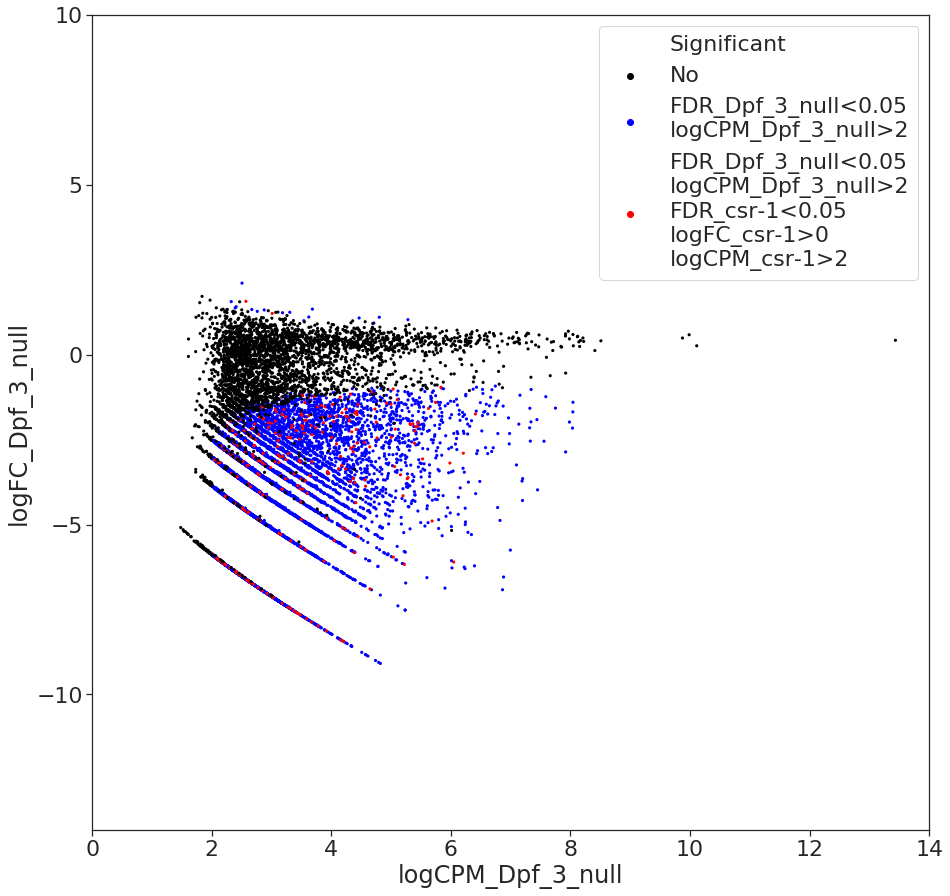

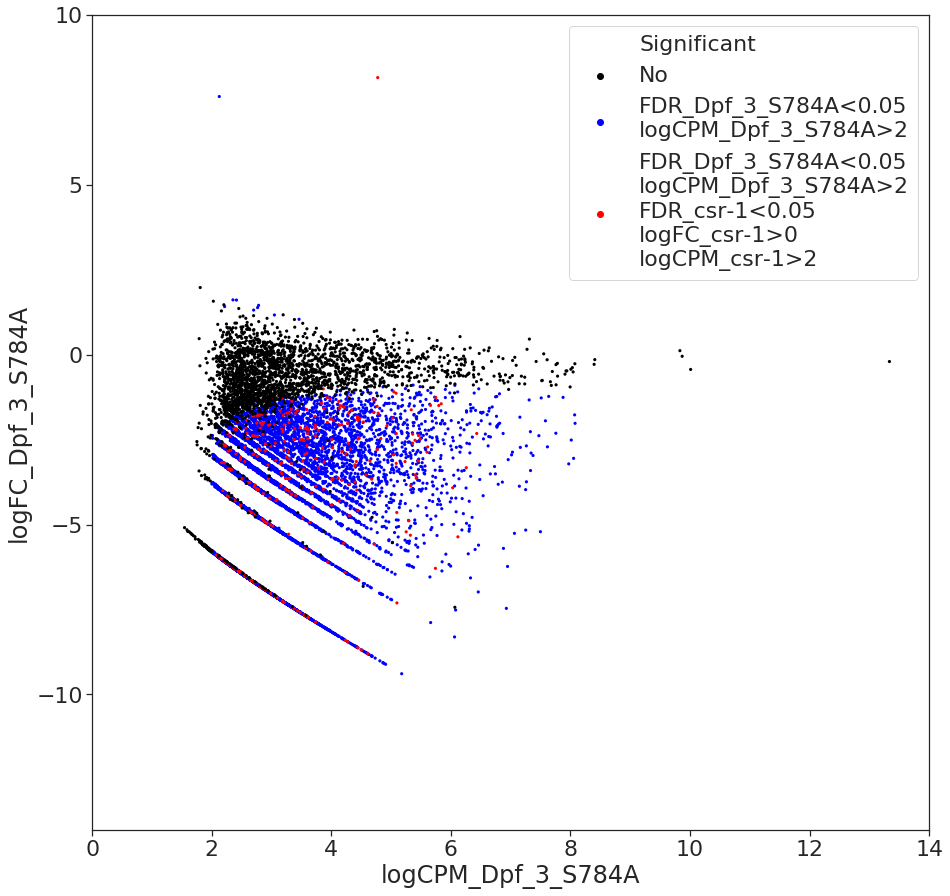

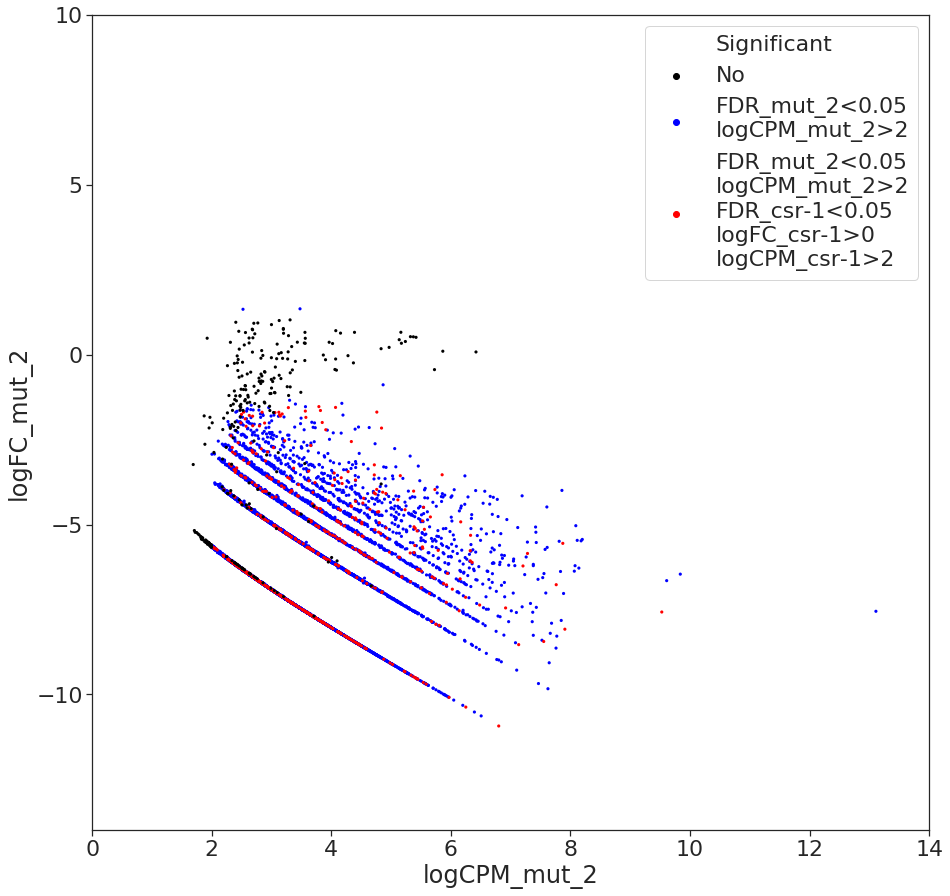

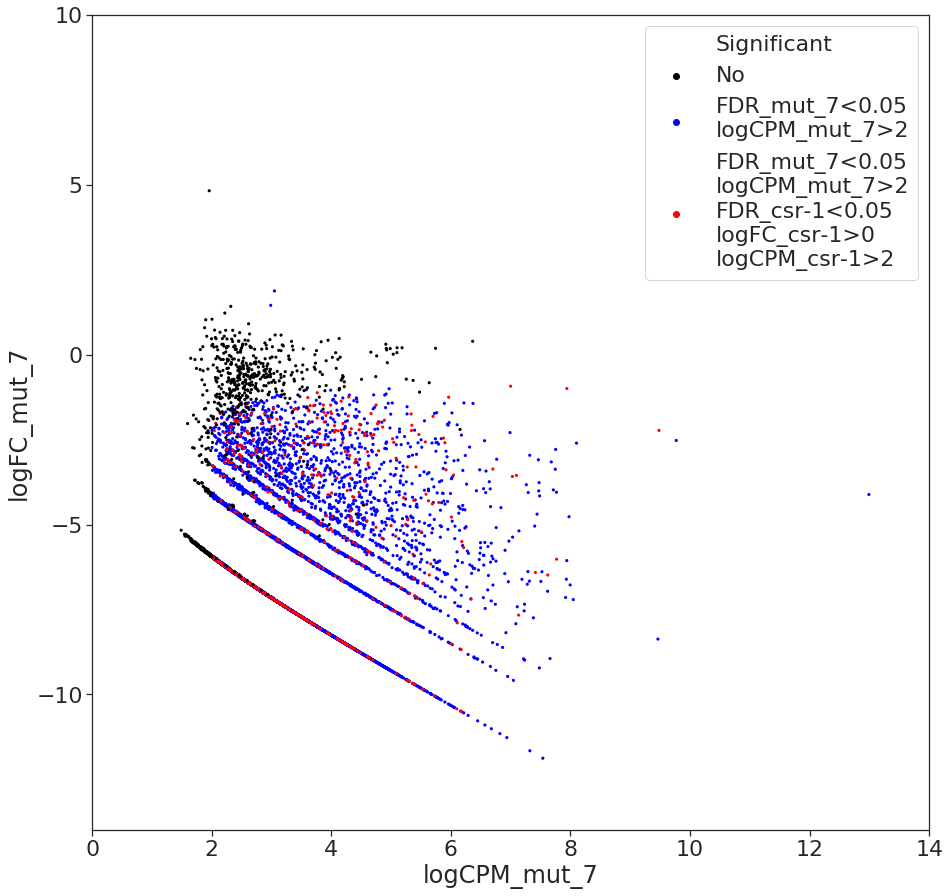

In [22]:
# make plots without IPs
plt.figure(figsize=(15,15))
df_wago_3_Dpf_3_null_lm_s = prepare_sc_plot_simple(df_wago_3_Dpf_3_null, Dpf_3_null_name)
df_wago_3_Dpf_3_null_lm_s.get_figure().savefig(f"plots/MA_{Dpf_3_null_name}.pdf")

plt.figure(figsize=(15,15))
df_wago_3_Dpf_3_S784A_lm_s = prepare_sc_plot_simple(df_wago_3_Dpf_3_S784A, Dpf_3_S784A_name)
df_wago_3_Dpf_3_S784A_lm_s.get_figure().savefig(f"plots/MA_{Dpf_3_S784A_name}.pdf")

plt.figure(figsize=(15,15))
df_wago_3_mut_2_lm_s = prepare_sc_plot_simple(df_wago_3_mut_2, mut_2_name)
df_wago_3_mut_2_lm_s.get_figure().savefig(f"plots/MA_{mut_2_name}.pdf")

plt.figure(figsize=(15,15))
df_wago_3_mut_7_lm_s = prepare_sc_plot_simple(df_wago_3_mut_7, mut_7_name)
df_wago_3_mut_7_lm_s.get_figure().savefig(f"plots/MA_{mut_7_name}.pdf")

# WAGO-3
plt.figure(figsize=(15,15))
df_wago_3_Dpf_3_null_lm = prepare_sc_plot(df_wago_3_Dpf_3_null, ip_name, Dpf_3_null_name)
df_wago_3_Dpf_3_null_lm.get_figure().savefig(f"plots/MA_{Dpf_3_null_name}_mark_{ip_name}.pdf")

plt.figure(figsize=(15,15))
df_wago_3_Dpf_3_S784A_lm = prepare_sc_plot(df_wago_3_Dpf_3_S784A, ip_name, Dpf_3_S784A_name)
df_wago_3_Dpf_3_S784A_lm.get_figure().savefig(f"plots/MA_{Dpf_3_S784A_name}_mark_{ip_name}.pdf")

plt.figure(figsize=(15,15))
df_wago_3_mut_2_lm = prepare_sc_plot(df_wago_3_mut_2, ip_name, mut_2_name)
df_wago_3_mut_2_lm.get_figure().savefig(f"plots/MA_{mut_2_name}_mark_{ip_name}.pdf")

plt.figure(figsize=(15,15))
df_wago_3_mut_7_lm = prepare_sc_plot(df_wago_3_mut_7, ip_name, mut_7_name)
df_wago_3_mut_7_lm.get_figure().savefig(f"plots/MA_{mut_7_name}_mark_{ip_name}.pdf")


# WAGO-9
plt.figure(figsize=(15,15))
df_wago_9_Dpf_3_null_lm = prepare_sc_plot(df_wago_9_Dpf_3_null, ip_wago_9_name, Dpf_3_null_name)
df_wago_9_Dpf_3_null_lm.get_figure().savefig(f"plots/MA_{Dpf_3_null_name}_mark_{ip_wago_9_name}.pdf")

plt.figure(figsize=(15,15))
df_wago_9_Dpf_3_S784A_lm = prepare_sc_plot(df_wago_9_Dpf_3_S784A, ip_wago_9_name, Dpf_3_S784A_name)
df_wago_9_Dpf_3_S784A_lm.get_figure().savefig(f"plots/MA_{Dpf_3_S784A_name}_mark_{ip_wago_9_name}.pdf")

plt.figure(figsize=(15,15))
df_wago_9_mut_2_lm = prepare_sc_plot(df_wago_9_mut_2, ip_wago_9_name, mut_2_name)
df_wago_9_mut_2_lm.get_figure().savefig(f"plots/MA_{mut_2_name}_mark_{ip_wago_9_name}.pdf")

plt.figure(figsize=(15,15))
df_wago_9_mut_7_lm = prepare_sc_plot(df_wago_9_mut_7, ip_wago_9_name, mut_7_name)
df_wago_9_mut_7_lm.get_figure().savefig(f"plots/MA_{mut_7_name}_mark_{ip_wago_9_name}.pdf")


# crs-1
plt.figure(figsize=(15,15))
df_csr_1_Dpf_3_null_lm = prepare_sc_plot(df_csr_1_Dpf_3_null, ip_csr_1_name, Dpf_3_null_name)
df_csr_1_Dpf_3_null_lm.get_figure().savefig(f"plots/MA_{Dpf_3_null_name}_mark_{ip_csr_1_name}.pdf")

plt.figure(figsize=(15,15))
df_csr_1_Dpf_3_S784A_lm = prepare_sc_plot(df_csr_1_Dpf_3_S784A, ip_csr_1_name, Dpf_3_S784A_name)
df_csr_1_Dpf_3_S784A_lm.get_figure().savefig(f"plots/MA_{Dpf_3_S784A_name}_mark_{ip_csr_1_name}.pdf")

plt.figure(figsize=(15,15))
df_csr_1_mut_2_lm = prepare_sc_plot(df_csr_1_mut_2, ip_csr_1_name, mut_2_name)
df_csr_1_mut_2_lm.get_figure().savefig(f"plots/MA_{mut_2_name}_mark_{ip_csr_1_name}.pdf")

plt.figure(figsize=(15,15))
df_csr_1_mut_7_lm = prepare_sc_plot(df_csr_1_mut_7, ip_csr_1_name, mut_7_name)
df_csr_1_mut_7_lm.get_figure().savefig(f"plots/MA_{mut_7_name}_mark_{ip_csr_1_name}.pdf")

# Playground

In [42]:
def prepare_sc_plot_simple_panel(df, df_name, ax):
    sns_plot = sns.scatterplot(x=f"logCPM_{df_name}",
                               y=f"logFC_{df_name}",
                               data=df.sort_values([f"Significant_{df_name}"]),
                               s=s,
                               hue=f"Significant_{df_name}",
                               hue_order=["No", "FDR<0.05\nlogCPM>2"],
                               palette=["black", "blue"],
                               alpha=alpha,
                               x_jitter=x_jitter,
                               y_jitter=y_jitter,
                               linewidth=linewidth,
                               ax=ax)
    sns_plot.set(xlim=xlim, ylim=ylim)
    return sns_plot

In [ ]:
def prepare_sc_plot_panel(df, df_1_name, df_2_name, ax):
    sns_plot = sns.scatterplot(x=f"logCPM_{df_2_name}",
                               y=f"logFC_{df_2_name}",
                               data=df.sort_values(["Significant"]),
                               s=s,
                               hue="Significant",
                               hue_order=["No", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"],
                               palette=["black", "blue", "red"],
                               alpha=alpha,
                               x_jitter=x_jitter,
                               y_jitter=y_jitter,
                               linewidth=linewidth,
                               ax=ax)
    sns_plot.set(xlim=xlim, ylim=ylim)

    return sns_plot

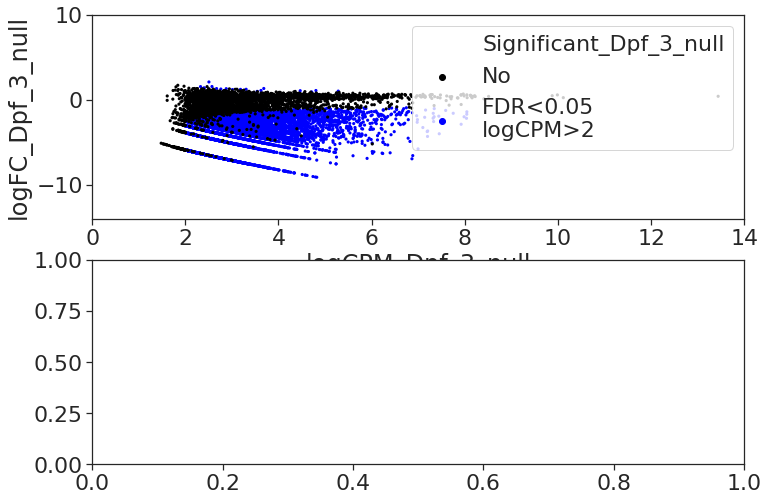

In [55]:
fig = plt.figure(figsize=(11.69,8.27))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
prepare_sc_plot_simple_panel(df_wago_3_Dpf_3_null, Dpf_3_null_name, ax=ax1)
# prepare_sc_plot_panel(df_wago_3_Dpf_3_null, Dpf_3_null_name, ax=ax2)

TypeError: 'AxesSubplot' object is not callable